In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

In [2]:
df=pd.read_csv("D:\datasets\Bearing1_1_merged_output.csv")

In [4]:
print(df.shape)

(4030464, 3)


In [3]:

normal=df['Horizontal_vibration_signals']
normal=normal.to_numpy()
print(normal)

[-0.39639469 -0.1231074   0.98884113 ... -4.79652882 -9.34609175
 -4.83307838]


In [7]:
# 定义数据分布展示

def show_plot(data,show_num):
    data_list = []
    for a in data[-1-show_num :]:
        data_list.append(a)
    return data_list

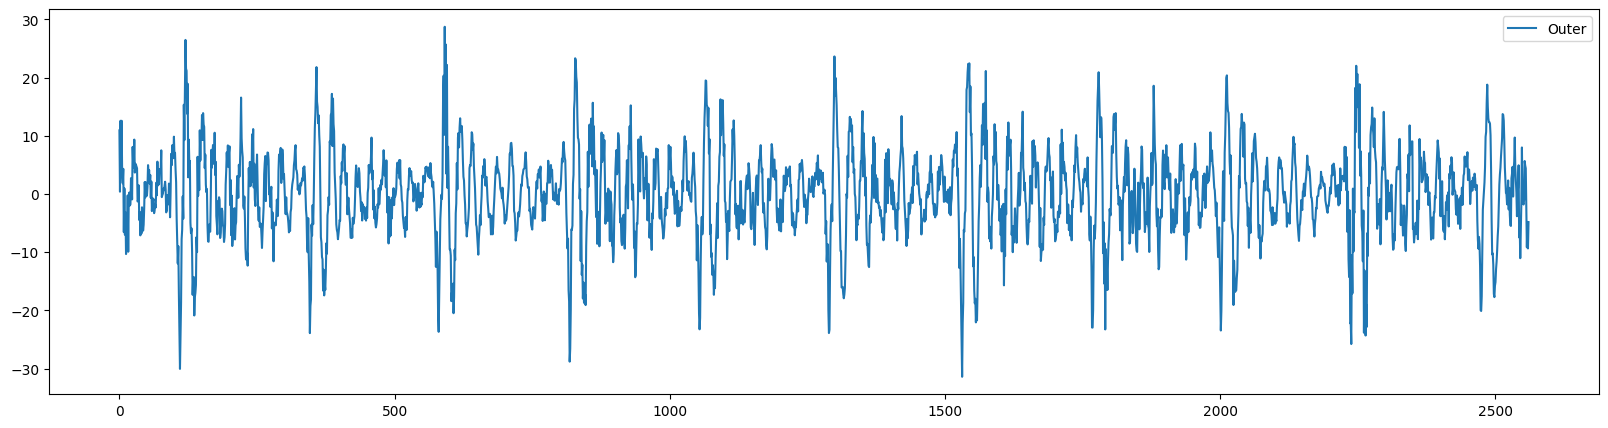

In [10]:
# 定义数据分布展示
show_num =2560
plt.figure(figsize=(20, 5))
plt.plot(show_plot(normal,show_num),label='Outer')
plt.legend()
plt.show()

In [11]:
df=pd.read_csv("D:\datasets\Bearing1_4_merged_output.csv")

In [13]:
inner=df['Horizontal_vibration_signals']
inner=inner.to_numpy()
print(inner)

[ 0.29679541  0.0526309   0.5465031  ...  0.24859911 -0.1442552
 -1.08252756]


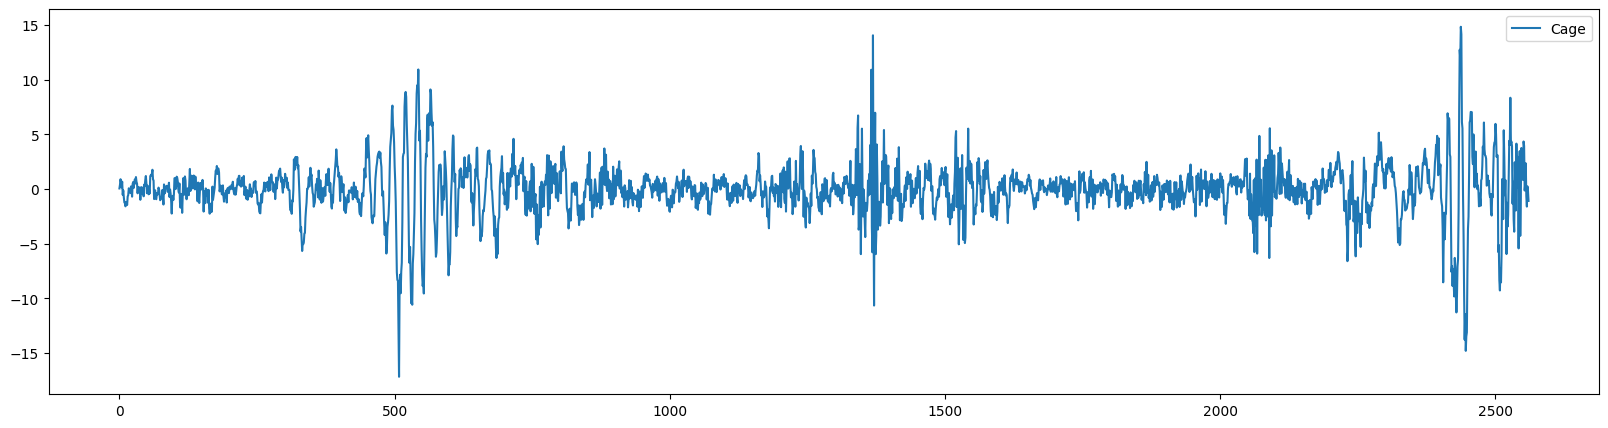

In [15]:
# 定义数据分布展示
show_num =2560
plt.figure(figsize=(20, 5))
plt.plot(show_plot(inner,show_num),label='Cage')
plt.legend()
plt.show()

In [16]:
df=pd.read_csv("D:\datasets\Bearing1_5_merged_output.csv")

In [18]:
ball=df['Horizontal_vibration_signals']
ball=ball.to_numpy()
print(ball)


[-0.60890909 -0.3597736   0.5511165  ...  0.56627989  3.77868414
  8.00281763]


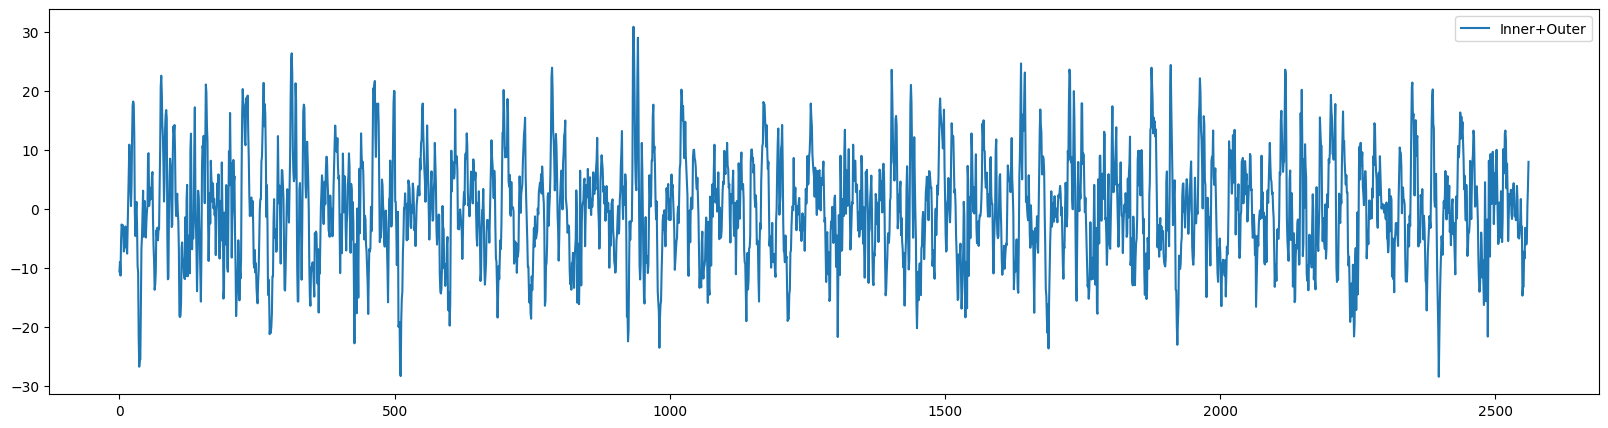

In [20]:
# 定义数据分布展示
show_num =2560
plt.figure(figsize=(20, 5))

plt.plot(show_plot(ball,show_num),label='Inner+Outer')
plt.legend()
plt.show()


In [10]:
df=pd.read_csv('ims_2.csv')

In [11]:
outer=df['Outer']
outer=outer.to_numpy()
print(outer)

[ 0.078  0.061  0.107 ... -0.002 -0.002 -0.002]


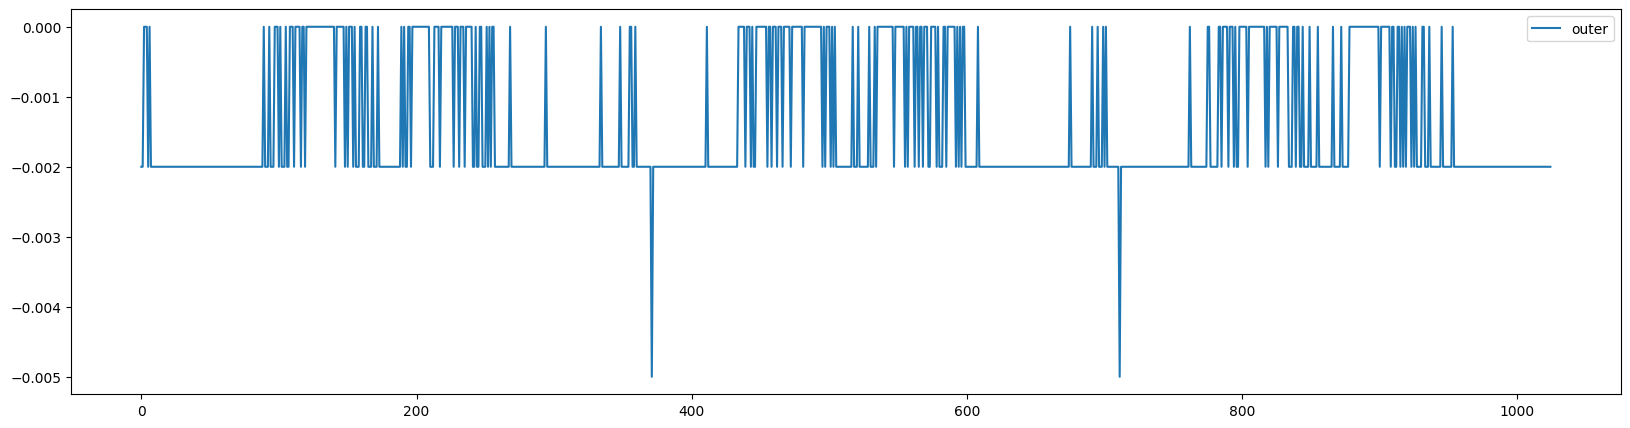

In [12]:
# 定义数据分布展示
show_num =1024
plt.figure(figsize=(20, 5))
plt.plot(show_plot(outer,show_num),label='outer')
plt.legend()
plt.show()

In [13]:
df=pd.read_csv('ims_3.csv')

In [14]:
outer=df['Outer']
outer=outer.to_numpy()
print(outer)

[ 0.039 -0.061 -0.007 ...  0.005  0.002  0.005]


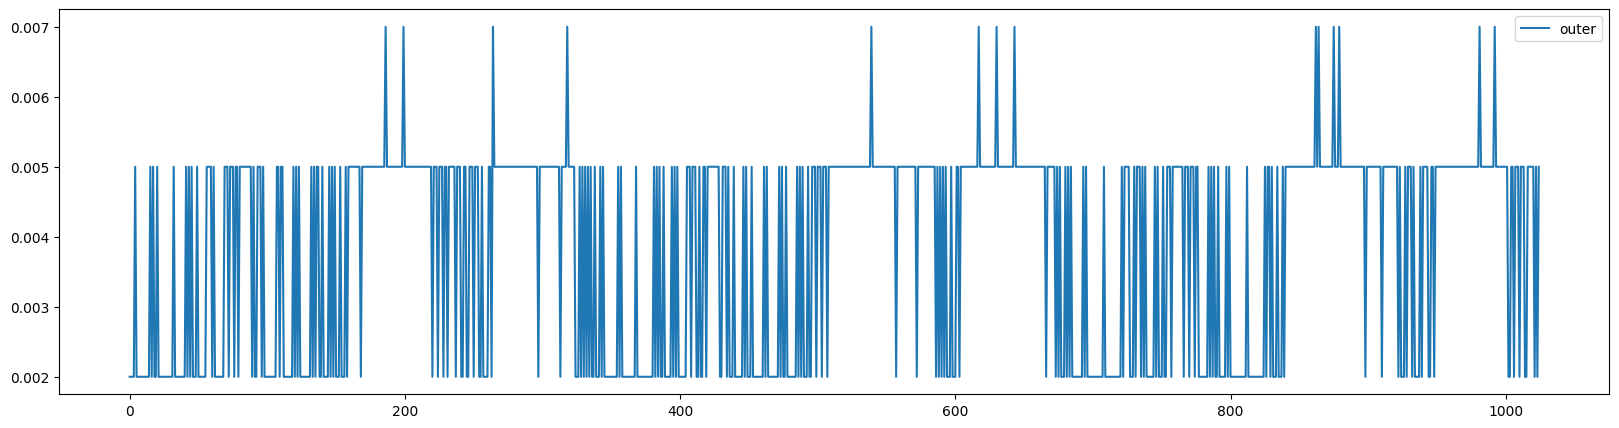

In [15]:
# 定义数据分布展示
show_num =1024
plt.figure(figsize=(20, 5))
plt.plot(show_plot(outer,show_num),label='outer')
plt.legend()
plt.show()


In [5]:
cut_num=2560

def data_load(label,filename,column_name):
    
    data = pd.read_csv(f'{filename}'+'.csv')
    
    
    org_DE = data[column_name]
    org_DE=org_DE.to_frame()
    # org_FE = data['X'+filename+'_FE_time']
    scaler = MinMaxScaler()
#     scaler.fit(list_DE)
    
    list_DE_n = scaler.fit_transform(org_DE)

    
    # 构建一维数组
    list_DE = []
    for de in list_DE_n:
        list_DE.append(de[0])
        
    data_cut = []
    label_cut = []
    
    # # 分割数据

    for i in range(0, len(list_DE) // cut_num):  
        segment = list_DE[i * cut_num : (i + 1) * cut_num]  
        
        # 将 segment 转换为 numpy 数组以便进行计算  
        segment_array = np.array(segment)  
        
        
        
        data_cut.append(segment_array)  
        
        # 添加对应的标签  
        label_cut.append(label)  

    
    
    return data_cut,label_cut

In [19]:
# normal:0,inner:1,ball:2,outer:3
data_list=[0]*3
label_list=[None]*3
data_list[0],label_list[0]=data_load("OUTER","D:\datasets\Bearing1_1_merged_output",'Horizontal_vibration_signals')
data_list[1],label_list[1]=data_load("CAGE","D:\datasets\Bearing1_4_merged_output",'Horizontal_vibration_signals')
data_list[2],label_list[2]=data_load("INNER+OUTER","D:\datasets\Bearing1_5_merged_output",'Horizontal_vibration_signals')
# data_list[3],label_list[3]=data_load(3,'ims_3','Outer')

data_train=np.asarray(data_list[0][-600:]+data_list[1][-600:]+data_list[2][-600:],dtype='float64')
# df=pd.DataFrame(data_train)
# df.to_csv("train_data_3classes.csv",index=False)
# print("处理前样本shape：",data_train.shape)
label=np.asarray(label_list[0][-600:]+label_list[1][-600:]+label_list[2][-600:],dtype='str')
# 将 label 贴到 data_train 的第一列前  

data_train_with_label = np.column_stack((label, data_train))
df=pd.DataFrame(data_train_with_label)
df.to_csv("train_data_3classes.csv",index=False)
# print("处理前样本shape：",data_train.shape)
data_train=data_train.reshape(data_train.shape[0],data_train.shape[1],1)
# print(data_train[-1][-1])
# label=label.reshape(label.shape[0],1)
print("处理后样本shape：",data_train.shape)
print("处理后数据类别分布：",Counter(label))

处理后样本shape： (1800, 2560, 1)
处理后数据类别分布： Counter({'OUTER': 600, 'CAGE': 600, 'INNER+OUTER': 600})


In [32]:
# 保存数据
np.save("xjtu_data_3class.npy",data_train)
np.save("xjtu_label_3class.npy",label)
print("数据保存成功，位置：/train_data/")

数据保存成功，位置：/train_data/
